In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir("C:\\code\\activ")

In [3]:
df_name = 'nov_nine_var.xlsx'

In [4]:
df = pd.read_excel('./documents/' + df_name).iloc[:,1::]
X = df.iloc[:,0:21].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
def make_dataset(X, length=12, n=100, test_size=0.2):
    X_data, y_data = [], []

    for i in range(0, len(X)-length-1):
        X_data.append(X[i:i+length])
        y_data.append(X[i+length+1])

    X_data = np.array(X_data)
    y_data = np.array(y_data)

    return train_test_split(X_data, y_data, test_size=test_size, shuffle=False)

In [7]:
X_train, X_test, y_train, y_test = make_dataset(X)

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64, activation='tanh', input_shape=(12, 21), return_sequences=True, dropout=0.2))
model.add(tf.keras.layers.LSTM(units=64, activation='tanh', return_sequences=False))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=21, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 64)            22016     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 21)                1365      
                                                                 
Total params: 60,565
Trainable params: 60,565
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/1000
11/11 [==============================] - 7s 150ms/step - loss: 0.1356 - val_loss: 0.1431
Epoch 2/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.0404 - val_loss: 0.0635
Epoch 3/1000
11/11 [==============================] - 0s 25ms/step - loss: 0.0190 - val_loss: 0.0268
Epoch 4/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.0144 - val_loss: 0.0284
Epoch 5/1000
11/11 [==============================] - 0s 41ms/step - loss: 0.0126 - val_loss: 0.0259
Epoch 6/1000
11/11 [==============================] - 0s 27ms/step - loss: 0.0111 - val_loss: 0.0256
Epoch 7/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.0108 - val_loss: 0.0253
Epoch 8/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.0106 - val_loss: 0.0260
Epoch 9/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.0100 - val_loss: 0.0254
Epoch 10/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.0099 - val_l

In [10]:
dnn = tf.keras.models.load_model('./model/dnn.h5')

In [11]:
b = []
for i in range(0, len(X)-12):
    b.append(X[i:i+12])

b = np.array(b).reshape(len(b), 12, 21)

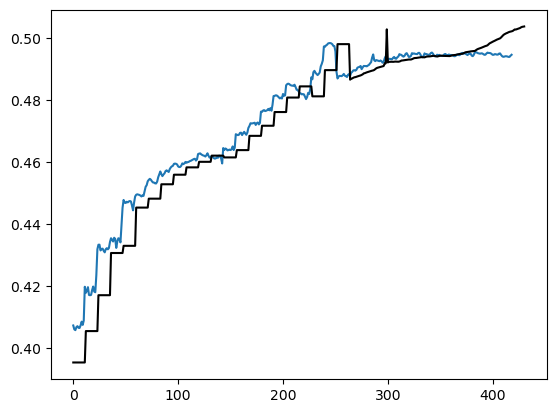

In [12]:
plt.plot(dnn.predict(model(b), verbose=0))
plt.plot(y, c='black')
plt.show()

In [13]:
model.save('./model/s_lstm.h5')